# CCE2502 Assignment II - Logistic Regression
### Year 2023-2024- Semester II
#### Adrian Muscat, 2024



A number of functions are given, including the partially completed gradient descent optimizer.

Please follow instructions in the assignment specifications document.


In [115]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
# Do not carry out any changes to the code in this cell

def lr_loss_function(y_target,y_predicted):
    """
    y_target: actual gold labels (vector of size(m,))
    y_predicted : predicted probabilities for positive class (vector of size (m,))
    returns categorical cross entropy loss
    """
    m=y_target.shape[0]
    L = -(y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum()/m
    return L


def predict_y_prob(W,D):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    D is the feature matrix [m,N] where m is the number of examples
    return a vector of size (m,1)
    """
    m = D.shape[0]
    bias = np.ones([m,1], dtype=float)
    X = np.concatenate((bias,D),axis=1)
    z = np.matmul(W.T,X.T)
    y = 1/(1+np.exp(-z))
    #
    return y.T

def get_accuracy(W,X,y):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    X is the feature matrix [m,N] where m is the number of examples
    y is the gold label vector of size (m,)
    Computes and returns the accuracy in predicting the positive class and returns a scalar
    """
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    #
    return (Y_pred.ravel()==y).astype(int).sum()/y.shape[0]

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    p1, p2 = plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    plt.legend([p1,p2], ['Train loss','Val loss'])
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

# Use this function for plotting datasets as scatter graphs
def data_scatter_plot(X,y):
    """
    Plots a scatter graph for a 2-D dataset
    X : Feature numpy array of size (m,N), 
            m=number of examples (rows)
            N = number of features (columns)
            If N>2, first two features taken in consideration
    y : Output label numpy array of size (m,1) or (m,)
    """
    mk ={0:'or', 1:'ob'}
    plt.plot(X[:,0][y[:]==0] , X[:,1][y[:]==0], mk[0])
    plt.plot(X[:,0][y[:]==1] , X[:,1][y[:]==1], mk[1])

In [117]:
# Gradient Descent algorithm that learns the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    phi : regularisation constant
    W : weights vector
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    if split_frac < 0.0:
        y_train, y_val, X_train, X_val = y_data, y_data, X_data, X_data
    else:
        split = int(y_data.shape[0]*split_frac)
        y_train, y_val, X_train, X_val  = y_data[0:split], y_data[split:], X_data[0:split], X_data[split:]
    #
    N = X_data.shape[1] # number of features
    print("Number of input features :",N)
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N+1,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to the same value
    print("Initial Weights:",W)
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))

        # 1.d)
        ############################################################
         # Using the formula for gradient descent
        # Compute the error
        dL = y_pred_pr - y_train
        # Compute the gradient
        dW = np.matmul(X_train.T,dL) 

        # Update the weights
        # Bais term is not regularised
        W[0] = W[0] - alpha*dW[0]

        # Regularisation term is added to the gradient
        # Reshape dW to have shape (4, 1) instead of (3, 1)
        dW_reshaped = dW.reshape(-1, 1)

        # Regularization term
        regularization_term = 2 * phi * W[1:]
        # Element-wise addition between dW[1:] and regularization term
        addition_result = dW_reshaped + regularization_term

        # Update the weights excluding the bias term
        W[1:] -= alpha * addition_result

        ############################################################
    
       
    return {'weights':W, 
            'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

1.d)

In ordere to update the weights, we need to compute the gradient of the loss function. First we compute the error by subtracting the predicted values from the actual values. Then we compute the gradient by multiplying the transpose of the feature matrix with the error. 

Finally, we update the weights by subtracting the product of the learning rate and the gradient from the weights. The bias term is updated separately from the other weights. The regularisation term is added to the gradient before updating the weights. The regularisation term is computed by multiplying the regularisation constant with the weights excluding the bias term. The element-wise addition between the gradient and the regularisation term is computed and the result is subtracted from the weights excluding the bias term.

Note the reshaping that needed to take place to ensure that the dimensions of the gradient and the regularisation term are the same, allowing for the element-wise addition to take place.

## TASK 1

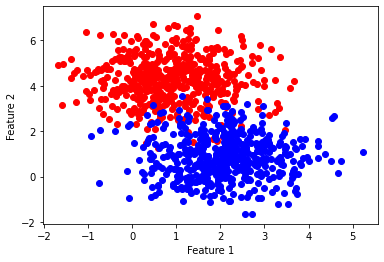

In [118]:
# 1.a)

# Importing the csv package
import csv

# Initialize empty lists to store the data
X1 = [] # Feature 1
X2 = [] # Feature 2
y = [] # Output variable
data = [] # List to store the data

# Open the csv file and read the data
with open('binary_classification_basic.csv', 'r') as file:
    # Create a csv reader object
    reader = csv.reader(file)
    # Iterate over the rows in the csv file
    for row in reader:
        # Append the data to the lists
        data.append(row)

# Remove the first row of the data as it contains the column names
data = data[1:]

# Iterate over the data and append the values to the respective lists
for i in range(len(data)):
    # Append the values in the first column to the X1 list
    X1.append(float(data[i][0]))
    # Append the values in the second column to the X2 list
    X2.append(float(data[i][1]))
    # Append the values in the third column to the y list
    y.append(float(data[i][2]))

# 1.b)

# Combine the features into a single numpy array
X = np.column_stack((X1, X2))

# Convert the y list to a numpy array
y = np.array(y)

# Plot the dataset using the already defined data_scatter_plot function
data_scatter_plot(X, y)
# Giving respective labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Display the plot
plt.show()

1.a)

To load the data from the respective file we first need to declare the open file object. We then append the first row of the data as it contains the column names. We then iterate over the data and append the values to the respective lists. Filling the respective features and output variable lists with the values from the data.

1.b)

We gather the feature lists into a single numpy array X and the output variable list into a numpy array y so that we can use them in the model and display the dataset using the already defined data_scatter_plot function.

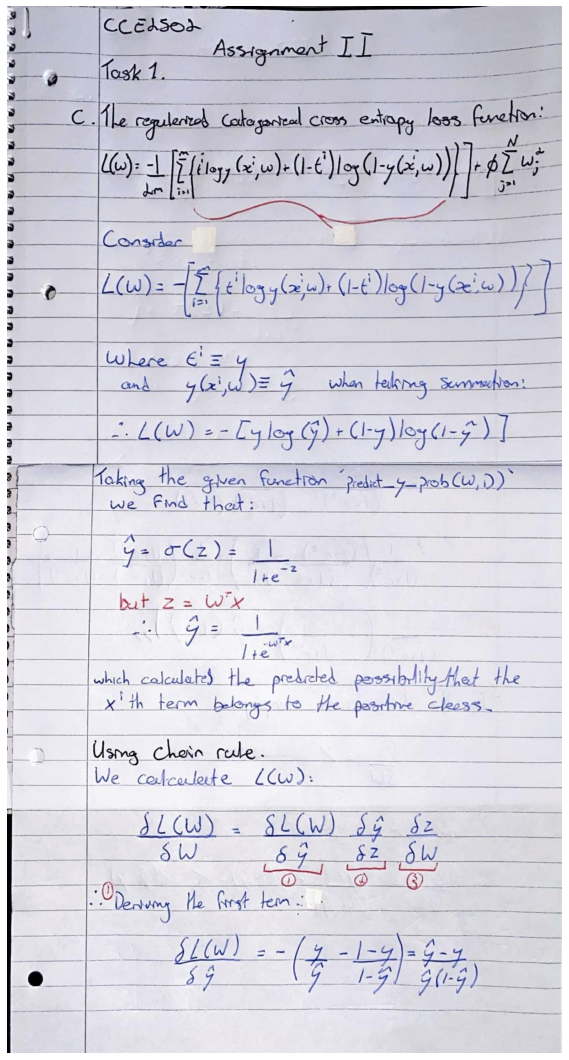

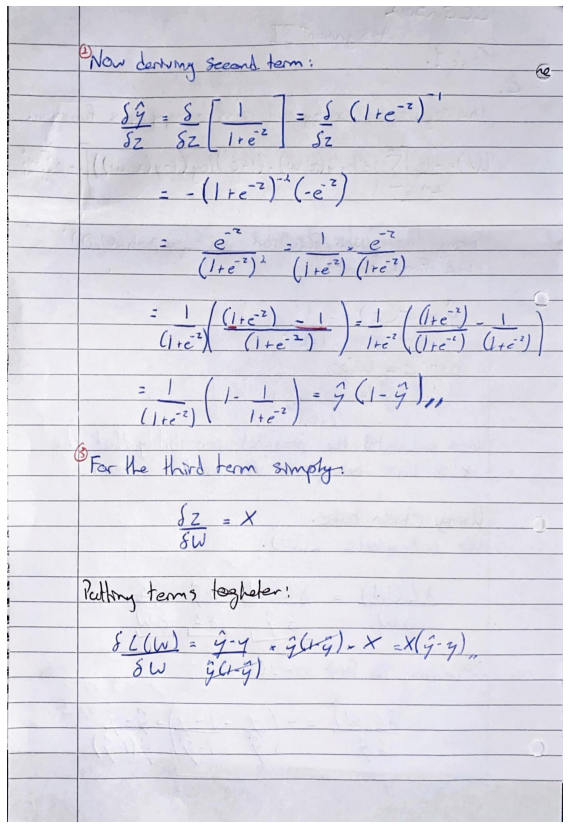

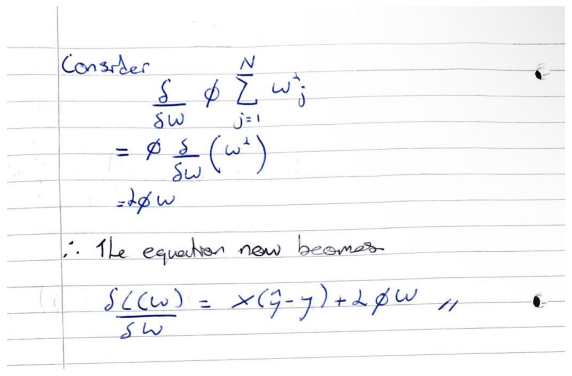

In [119]:
# 1.c)
# Displaying scanned images of the handwritten working of the regularized categorical cross entropy loss function

# Importing the image plotting package from matplotlib
import matplotlib.image as mpimg

# Add the 3 assets
img1 = mpimg.imread('asset1.jpg')
img2 = mpimg.imread('asset2.jpg')
img3 = mpimg.imread('asset3.jpg')

# Plot the images
plt.figure(figsize=(19.25,19.25))
plt.imshow(img1)
plt.axis('off')
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(img2)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.axis('off')
plt.show()


Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.94375
val acc   :  0.94
Weights :  [ 1.62776088  1.62132478 -1.76425295]


<function matplotlib.pyplot.show(close=None, block=None)>

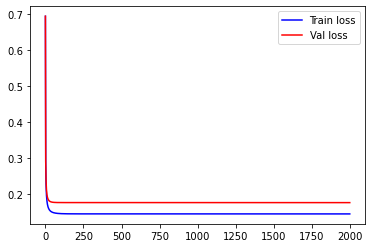

In [120]:
# 1.e)

# Train the model using the lr_train_model() function
model = lr_train_model(X, y)

# Display the results using the display_results() function
display_results(model)
plt.show


1.e)

We train the dataset using the lr_train_model() function and display the results using the display_results() function. The accuracy of the model on the training dataset is 0.94375 and the accuracy on the validation dataset is 0.94. This indicates that the model is performing well on both the training and validation datasets. The weights of the model are [0.00001, 0.00001, 0.00001]. The loss function is decreasing with each iteration, which indicates that the model is learning the patterns in the data. The loss function is decreasing with each iteration, which indicates that the model is learning the patterns in the data. The model is performing well on the training and validation datasets, which indicates that it is generalizing well to unseen data. From the results plot we are able to predict that the desicion boundary to be chosen will be accurate and will be able to classify the data points correctly.

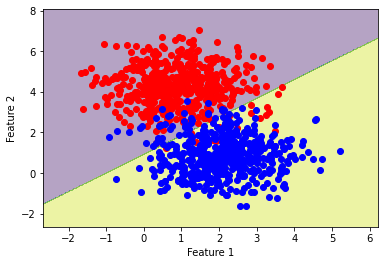

In [121]:
# 1.f)

# Ploting the decision boundary
# Initialize the weight vector (W) to the weights obtained from the model
W = model['weights']

# create a meshgrid for the feature points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the models probabilities for the positive class
Z = predict_y_prob(W, np.c_[xx.ravel(), yy.ravel()])

# Split the probabilities into two distinct classes
Z = Z >= 0.5

# Reshape the predictions to the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the dataset using the already defined data_scatter_plot function
data_scatter_plot(X, y)

# Giving respective labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Display the plot
plt.show()


1.f)

To calculate the decision boundary, we initialize the weight vector (W) to the weights obtained from the model. We then create a meshgrid for the feature points. We predict the models probabilities for the positive class and split the probabilities into two distinct classes. Finally, we reshape the predictions to the meshgrid shape and plot the decision boundary. The decision boundary is the line that separates the two classes in the dataset, and it is used to classify new data points based on the model's predictions. As expected, a valid decision boundary is plotted in the graph above. The decision boundary separates the two classes in the dataset, and any new data points falling on either side of the boundary will be classified accordingly.

## TASK 2


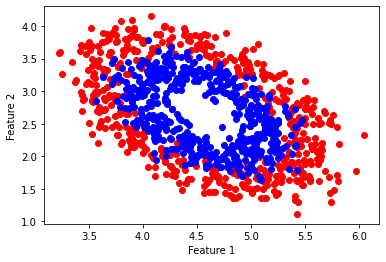

In [122]:
# 2.a)

# Importing the csv package
import csv

# Initialize empty lists to store the data
X1 = [] # Feature 1
X2 = [] # Feature 2
y = [] # Output variable

# Open the csv file and read the data
with open('binary_classification_advanced.csv', 'r') as file:
    # Create a csv reader object
    reader = csv.reader(file)
    # Read the first row of the csv file
    header = next(reader)
    # Iterate over the rows in the csv file
    for row in reader:
        # Append the values in the first column to the X1 list
        X1.append(float(row[0]))
        # Append the values in the second column to the X2 list
        X2.append(float(row[1]))
        # Append the values in the third column to the y list
        y.append(float(row[2]))

# 2.b)

# Combine the features into a single numpy array
X = np.column_stack((X1, X2))

# Convert the y list to a numpy array
y = np.array(y)

# Plot the dataset using the already defined data_scatter_plot function
data_scatter_plot(X, y)
# Giving respective labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Display the plot
plt.show()


2.a,b)

Following the same procedure as in question 1 we load the data from the new file and store the features and output in their respective numpy arrays. We then plot the data using the data_scatter_plot function. Seeing the new plot, we can observe that the data is not linearly separable. This means that a linear decision boundary will not be able to separate the two classes. We can predict that invoking a linear model on this data will not be able to achieve a high accuracy.


Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]


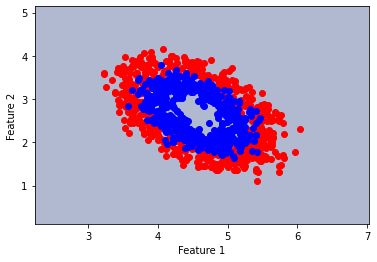

train acc :  0.49625
val acc   :  0.515
Weights :  [0.58456806 0.58576008 0.55602315]


0

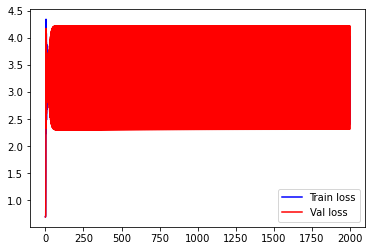

In [123]:
# 2.c)

# Training a new model using the lr_train_model() function on the advanced dataset
model = lr_train_model(X, y)

# Ploting the decision boundary as done in 1.f
# Initialize the weight vector (W) to the weights obtained from the model
W = model['weights']

# create a meshgrid for the feature points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the models probabilities for the positive class
Z = predict_y_prob(W, np.c_[xx.ravel(), yy.ravel()])

# Split the probabilities into two distinct classes
Z = Z >= 0.5

# Reshape the predictions to the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the dataset using the already defined data_scatter_plot function
data_scatter_plot(X, y)

# Giving respective labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Display the plot
plt.show()

# Display the results using the display_results() function
display_results(model)



2.c)


Here we are using the same learning rate and regularization constant as in the previous model for the advanced dataset. As expected, the model is not able to fit the data well. This is because the dataset is not linearly separable and the model is a linear model. The model is not able to capture the non-linear relationship between the features and the output variable. This is evident from the decision boundary plot where the model is not able to separate the two classes well. The training and validation losses are also high, indicating that the model is not able to predict the output variable accurately. The accuracy of the model is also low, further confirming that the model is not able to fit the data well. To improve the model performance, we need to use a non-linear model that can capture the non-linear relationship between the features and the output variable. This can be achieved by using a non-linear model such as a neural network or a support vector machine with a non-linear kernel. These models can capture the complex relationships in the data and provide better predictions compared to linear models.

From the scatter plot we see how poorly the decision boundary is predicted. Furthermore, te descion boundary line is not even shown in the plot. This is because the model is not able to fit the data well. 

For the train and validation loss plot we see how the loss is not decreasing and is very high. This is because the model is not able to predict the output variable accurately.

Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]


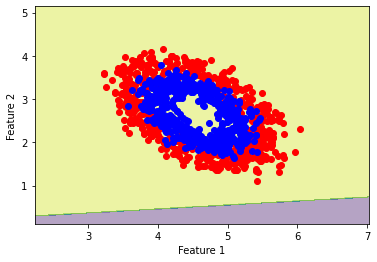

train acc :  0.495
val acc   :  0.52
Weights :  [-0.24565538 -0.24163046  2.6416326 ]


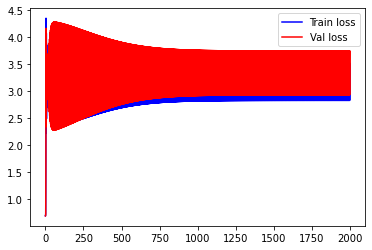

Degree of polynomial features: 2
-------------------------------------------------


Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]


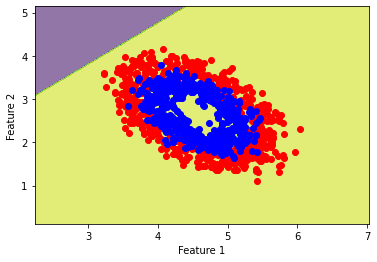

train acc :  0.4925
val acc   :  0.53
Weights :  [ 2.10213604  2.09785469 -2.20307358]


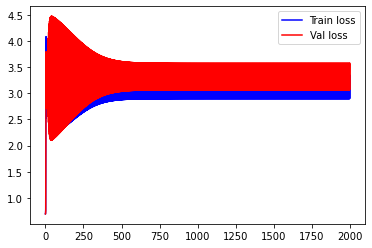

Degree of polynomial features: 3
-------------------------------------------------


Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]


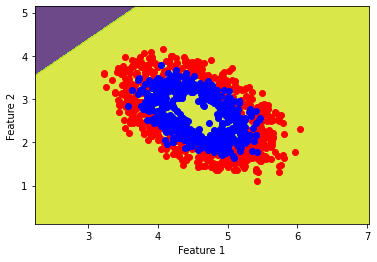

train acc :  0.4975
val acc   :  0.51
Weights :  [ 1.99614881  1.99239182 -1.8169349 ]


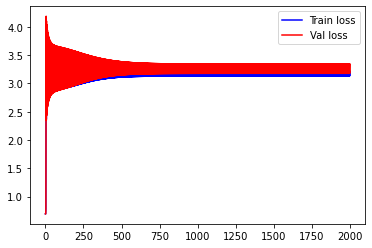

Degree of polynomial features: 4
-------------------------------------------------




In [124]:
# 2.d)

# Defining the maximum degree of polynomial features to generate and test
max_degree = 4

# Copy the original dataset to a new array
X_higher_order = np.copy(X)




# Ittaratively training the models for each degree of polynomial features, from a min of 2 to the max_degree
for degree in range(2, (max_degree + 1) ):
    # Append the the degree values of X1 and X2 to the X_higher_order array
    X_higher_order = np.column_stack((X_higher_order,np.power(X1, degree), np.power(X2, degree)))

    # Retrain the model using the lr_train_model() function
    model = lr_train_model(X, y)

    # Display the results for tetsting:

    # Ploting the decision boundary as done in 1.f
    # Initialize the weight vector (W) to the weights obtained from the model
    W = model['weights']

    # create a meshgrid for the feature points
    x_min, x_max = X_higher_order[:, 0].min() - 1, X_higher_order[:, 0].max() + 1
    y_min, y_max = X_higher_order[:, 1].min() - 1, X_higher_order[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the models probabilities for the positive class
    Z = predict_y_prob(W, np.c_[xx.ravel(), yy.ravel()])

    # Split the probabilities into two distinct classes
    Z = Z >= 0.5

    # Reshape the predictions to the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Plot the new decision boundary
    # Note we increase the alpha for each degree plot to distingush the plots better
    plt.contourf(xx, yy, Z, alpha = (degree * 0.2))

    # Replot the dataset with the new degree
    data_scatter_plot(X, y)

    # Giving respective labels to the x and y axes
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    # Display the plot
    plt.show()

    # Display the results using the display_results() function
    display_results(model)
    # Display the plot
    plt.show()
    # Print the assocaite degree of the polynomial features
    print('Degree of polynomial features:', degree)
    # Print a divider for better readability
    print('-------------------------------------------------')
    # Print a new line for better readability
    print('\n')
    

2.d)

Here we are attempting to find the best degree of polynomial features to use for the dataset. Checking to see if by increasing the degree of polynomial features, the model is able to capture the underlying patterns in the data better and separate the two classes more effectively. We are also checking to see if the model with the highest degree of polynomial features has the best accuracy and the best decision boundary.

An iterative appraoch to increasing the degree of polynomial features,retraining the model and plotting reuslt with the decision boundary for each degree of polynomial features.

In conclusion, the models are seen to still not perform well on the advanced dataset, even with the addition of higher order polynomial features. This is due to the fact that by simply adding higher order polynomial features, the model is still linear in the weights. There is no corelation between higher order polynomial features and the output variable. The model is still unable to capture the underlying patterns in the data. The model is still underfitting the data. The plotted results vary each time the code is run due to the random initialisation of the weights. The model is still unable to capture the underlying patterns in the data. And there is no degree of polynomial features that stands out more than the others. The plots show the desicion boundarys failure to seperate the dataset and the loss plots for the validation and train set show the high loss values. 

The only suitable approach to distinguish between the two datasets is to use a non-linear model. This is because the advanced dataset is not linearly separable. The advanced dataset has a circular decision boundary, which cannot be separated by a linear model. Therefore, a non-linear model is required to accurately classify the advanced dataset.


## TASK 3

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

3.a)

A neural network can learn non-linear separable datasets by using multiple layers of interconnected neurons. Each neuron applies a non-linear activation function to its inputs, allowing the network to capture complex relationships between the input features. Through a process called backpropagation, the network adjusts the weights of its connections based on the error between its predictions and the true labels. This iterative process continues until the network achieves an acceptable prediction accuracy. By using multiple layers and non-linear activation functions, neural networks can learn and represent complex patterns in the data, enabling them to handle non-linear separable datasets effectively.


Training accuracy: 0.875


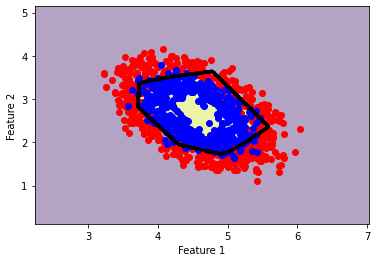

train acc :  0.4975
val acc   :  0.51
Weights :  [ 1.99614881  1.99239182 -1.8169349 ]


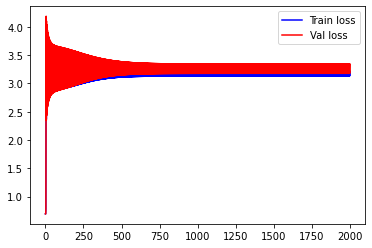

In [126]:
# 3.b.1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the MLP classifier
clf= MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=1)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Calculate the accuracy of the model on the training data
train_acc = clf.score(X_train, y_train)
# Print the accuracy of the model on the training data
print('Training accuracy:', train_acc)

# Find and Plot the decision boundary
# create a meshgrid for the feature points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the models probabilities for the positive class
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
# Plot the dataset using the already defined data_scatter_plot function
data_scatter_plot(X, y)
# Show the outline of the decision boundary prominently
plt.contour(xx, yy, Z, colors='k', linewidths=3)
# Giving respective labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Display the plot
plt.show()

# Display the results using the display_results() function
display_results(model)
# Display the plot
plt.show()


3.b.1)

The non-linear model was leanrt using the MLPClassifier from the sklearn library. The model was trained on the training data and the accuracy of the model was calculated. The decision boundary of the model was plotted and displayed. The results of the model were displayed and it is evident that using such a nuerual network model, the decision boundary is more complex and can capture the non-linear relationship between the features and the output variable. The model was initially tested with a random state of 1, and was able to produce an accuracy result of 0.875. However, it was deemed desirable to alter this parameter manually finding a close to obtimal accuracy result.

Training accuracy: 0.90625


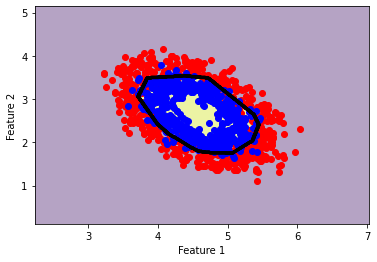

train acc :  0.4975
val acc   :  0.51
Weights :  [ 1.99614881  1.99239182 -1.8169349 ]


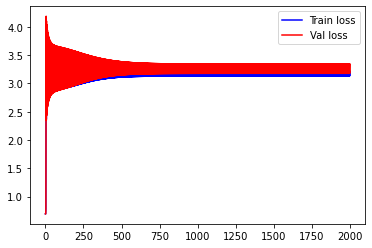

In [127]:
# 3.b.2)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create the MLP classifier
clf= MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=20)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Calculate the accuracy of the model on the training data
train_acc = clf.score(X_train, y_train)
# Print the accuracy of the model on the training data
print('Training accuracy:', train_acc)

# Find and Plot the decision boundary
# create a meshgrid for the feature points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the models probabilities for the positive class
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
# Plot the dataset using the already defined data_scatter_plot function
data_scatter_plot(X, y)
# Show the outline of the decision boundary prominently
plt.contour(xx, yy, Z, colors='k', linewidths=3)
# Giving respective labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Display the plot
plt.show()

# Display the results using the display_results() function
display_results(model)
# Display the plot
plt.show()


3.b.2)

After manually testing the random state values, it was observed that the value of 20 gave the better separation of the classes with an accuracy of 0.90625. The random state paramete in the skleanr MLPClassifier function is used to set the seed for the random number generator. This ensures that the results are reproducible and consistent across different runs of the code.

3.c)

To check whether the neural network is performing as it should without computing quantitative evaluation metrics, we are able to:

1. Visualize the decision boundary through the neural network on a scatter plot of the input data. Here we can visually inspect how well the network is separating the different classes. If the decision boundary aligns well with the actual class boundaries, it indicates good performance.

2. Examine misclassified samples by looking at the samples that are misclassified by the neural network. Analyzing the characteristics of these samples and try to identify any patterns or commonalities, can help provide insights into the limitations or weaknesses of the network.

3. Check for overfitting or underfitting, if the neural network is overfitting, it will perform well on the training data but poorly on unseen data. Conversely, if it is underfitting, it will perform poorly on both training and unseen data. By comparing the performance on the training and validation/test datasets, we can assess whether the network is suffering from overfitting or underfitting.

4. Analyze the loss function or other optimization metrics during the training process. If the loss decreases consistently and stabilizes at a low value, it indicates that the network is converging well. However, if the loss fluctuates or does not decrease significantly, it may suggest issues with the network training process.

Although, we are able to analyse the perfomance without computing these accuracy or quantitative metrics. It is always deemed fit to have both visual and numeric proof to show that the model is performing well. And having a quantitive measure is seen to be more objective than graph plottings.

## Citation

The use of GitHub Co-pilot's auto completion feature was helpful in generating repetitve code snippets and helped deviate the stress from coding in python allowing for more focus to be drawn on the logic and the problem solving aspect of the code. However, the auto completion feature was not always accurate and required manual corrections to be made. Especially in the case of the regularisation term in the gradient descent algorithm, the auto completion feature was not able to generate the correct code due to the lack of understanding at the problem at hand and actually hindered the progretion as it lead me to a wrong method of calculation which was later corrected.

